In [75]:
import pandas as pd
import numpy as np
import os
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns

## First: extract only relevant stations

In [76]:
#Useful global variables
stations=['pampulha', 'cercadinho', 'florestal', 'ibirite', 'sete lagoas', 'divinopolis', 'ouro branco','timoteo','oliveira',
          'manhuacu', 'barbacena', 'sao joao del rei', 'dores do indaia', 'curvelo', 'guanhaes']

codes = {'pampulha':'3106200','cercadinho':'3106200','florestal':'3126000','ibirite':'3129806','sete lagoas':'3167202',
        'divinopolis':'3122306','ouro branco':'3145901','timoteo':'3168705','oliveira':'3145604','manhuacu':'3139409',
         'barbacena':'3105608','sao joao del rei':'3162500','dores do indaia':'3123205','curvelo':'3120904','guanhaes':'3128006'}

years = ['2018','2019','2020','2021','2022']

In [77]:
for y in years:
    count=0
    for file in os.listdir(y):
        if not any(substring in file.lower() for substring in stations):
            os.remove(y+'/'+file)
        else:
            count+=1
    print(count)

15
15
15
15
15


## Then, clean data so it is useable

In [115]:
df=pd.read_csv('2021/INMET_SE_MG_A535_FLORESTAL_01-01-2021_A_31-12-2021.CSV',encoding='latin1',sep=';',skiprows=8)
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2021/01/01,0000 UTC,0,929,"929,1","928,8",NaN,22,"19,3","22,9","21,8","19,7","19,1",85.0,82.0,85.0,135.0,"1,4",",1",NaN
1,2021/01/01,0100 UTC,0,"929,8","929,8",929,NaN,21,19,22,21,"19,4","18,9",89.0,85.0,89.0,144.0,"1,2",0,NaN
2,2021/01/01,0200 UTC,0,"929,6",930,"929,6",NaN,"21,1","19,1","21,4","20,7","19,6","18,9",90.0,88.0,88.0,15.0,"1,2",",1",NaN
3,2021/01/01,0300 UTC,0,"929,2","929,6","929,2",NaN,"20,2","18,7","21,1","20,2","19,3","18,7",91.0,88.0,91.0,158.0,"1,4",0,NaN
4,2021/01/01,0400 UTC,0,"928,8","929,2","928,8",NaN,"19,9","18,6","20,5","19,9","19,1","18,6",92.0,91.0,92.0,170.0,",7",0,NaN


In [79]:
#We can see that columns that should be numeric aren't
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   8760 non-null   object 
 1   Hora UTC                                               8760 non-null   object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       7400 non-null   object 
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  7399 non-null   object 
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        7370 non-null   object 
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       7370 non-null   object 
 6   RADIACAO GLOBAL (Kj/m²)                                4083 non-null   object 
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           7399 non-null   object 
 8   TEMPERATURA DO PONTO DE ORVALHO (°C)            

In [80]:
#Change decimal points of all string columns
for column in df.columns[2:]:
    if not is_numeric_dtype(df[column]):
        df[column]=pd.to_numeric(df[column].str.replace(',','.'))

In [117]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].value_counts().sort_values(ascending=False)[:10]

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)
0      6817
,2      146
,4       55
,6       49
,8       32
1        28
1,2      22
1,6      21
2,6      16
2,2      15
Name: count, dtype: int64

In [82]:
#Create a timestamp column that combines DATA and HORA
df['timestamp'] = pd.to_datetime(df[df.columns[0]] +' '+ df[df.columns[1]],utc=True)
#then drop useless column
df.drop(columns='Unnamed: 19',inplace=True,errors='ignore')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype              
---  ------                                                 --------------  -----              
 0   Data                                                   8760 non-null   object             
 1   Hora UTC                                               8760 non-null   object             
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       7400 non-null   float64            
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  7399 non-null   float64            
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        7370 non-null   float64            
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       7370 non-null   float64            
 6   RADIACAO GLOBAL (Kj/m²)                                4083 non-null   float64            
 7   TEMPERATURA DO AR - BULB

In [84]:
#Now that we have a decent first test of cleaning the file, we can create a function to do so for all files
def clean_df(df):
    #Change decimal points of all string columns
    for column in df.columns[2:]:
        if not is_numeric_dtype(df[column]):
            df[column]=pd.to_numeric(df[column].str.replace(',','.'))
            #some stations use -9999 as nan
            df.loc[df[column]==-9999,column]=np.nan
    #Create a timestamp column that combines DATA and HORA
    df['timestamp'] = pd.to_datetime(df[df.columns[0]] +' '+ df[df.columns[1]],utc=True)
    #then drop useless column
    df.drop(columns='Unnamed: 19',inplace=True,errors='ignore')
    return df

### Formating new file

 - We want to put all stations for a year in a single file, so that it's easier to load to sgbd/QGIS.
 - We will also georeference the station to a city while we parse the files
 - We also want to use same name for Date and hour columns

In [85]:
def match_city_and_station(filename):
    for station in stations:
        if station in filename.lower():
            return station,codes[station]
    raise Exception('missing station')

In [86]:
dfs_by_year = {}
station_data = []
for year in years:
    year_df = []
    for file in os.listdir(year):
        latitude = longitude = None
        #get latitude and longitude
        with open(f'{year}/'+file,encoding='latin1') as geofile:
            for line in geofile:
                if 'latitude' in line.lower():
                    latitude = float(line.replace(',','.').strip('\n').split(';')[1])
                elif 'longitude' in line.lower():
                    longitude = float(line.replace(',','.').strip('\n').split(';')[1])
                    break
        df = pd.read_csv(f'{year}/'+file,encoding='latin1',sep=';',skiprows=8)
        df = clean_df(df)
        df.rename(columns={df.columns[0]:'Data',df.columns[1]:'Hora UTC'},inplace=True)
        df['Data']=df['Data'].str.replace('/','-')
        station,code = match_city_and_station(file)
        df['CODIGO MUNICIPIO'] = code
        df['NOME ESTACAO'] = station
        station_data.append([code,station,latitude,longitude])
        year_df.append(df)
    year_df = pd.concat(year_df)
    dfs_by_year[year] = year_df

In [87]:
pd.DataFrame(station_data,columns=['CODIGO MUNICIPIO','NOME ESTACAO','LATITUDE','LONGITUDE']).drop_duplicates(subset='NOME ESTACAO',keep='last').to_csv('dados_das_estacoes.csv',index=False)
for year in dfs_by_year:
    dfs_by_year[year].to_csv(f'INMET_{year}.csv',index=False)

In [88]:
dfs_by_year['2021'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 131400 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count   Dtype              
---  ------                                                 --------------   -----              
 0   Data                                                   131400 non-null  object             
 1   Hora UTC                                               131400 non-null  object             
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       119659 non-null  float64            
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  122322 non-null  float64            
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        122237 non-null  float64            
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       122237 non-null  float64            
 6   RADIACAO GLOBAL (Kj/m²)                                70757 non-null   float64            
 7   TEMPERATURA DO AR 

In [89]:
def get_missing_data(dfs_by_year):
    df=[]
    for year in dfs_by_year:
        stations = []
        stats = []
        for station,gb in dfs_by_year[year].groupby('NOME ESTACAO'):
            stations.append(station)
            stats.append(gb['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].count())
        df.append(stats)
    df = pd.DataFrame(df,columns=stations,index=dfs_by_year.keys())
    return df

In [100]:
print('Numeros de pontos de dados por ano(o esperado é 8760-8784):')
d=get_missing_data(dfs_by_year)
display(d)
print('Média de medições por ano')
d.mean(axis=1)

Numeros de pontos de dados por ano(o esperado é 8760-8784):


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2018,8757,8747,8760,8744,7295,8419,7969,8746,8066,8757,8759,8759,8760,8659,8342
2019,8753,8754,8633,8760,8757,8759,7953,8742,8522,8758,8758,8760,8760,8758,8760
2020,8776,8767,8784,8780,8784,8784,8712,8754,6921,8070,8784,8695,7284,6233,8784
2021,8561,8759,4405,8040,7656,7400,7949,8736,8039,8760,8731,8760,8760,7545,7558
2022,8721,8679,8758,8757,8687,6483,8478,8696,8665,8760,5821,8752,8756,8715,8760


Média de medições por ano


2018    8502.600000
2019    8679.133333
2020    8327.466667
2021    7977.266667
2022    8365.866667
dtype: float64

In [122]:
def get_dailyavg_stats_per_year(df,data='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',how='mean'):
    df=[]
    for year in dfs_by_year:
        stations = []
        stats = []
        for station,gb in dfs_by_year[year].groupby('NOME ESTACAO'):
            stations.append(station)
            if how=='mean':
                stats.append(gb.groupby('Data')[data].mean().mean())
            else:
                stats.append(gb.groupby('Data')[data].mean().std())
        df.append(stats)
    df = pd.DataFrame(df,columns=stations,index=dfs_by_year.keys())
    print(f'{how} {data} per day')
    display(df)
    return df

def get_dailysum_stats_per_year(df,data='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',how='mean'):
    df=[]
    for year in dfs_by_year:
        stations = []
        stats = []
        for station,gb in dfs_by_year[year].groupby('NOME ESTACAO'):
            stations.append(station)
            if how=='mean':
                stats.append(gb.groupby('Data')[data].sum().mean())
            else:
                stats.append(gb.groupby('Data')[data].sum().std())
        df.append(stats)
    df = pd.DataFrame(df,columns=stations,index=dfs_by_year.keys())
    print(f'{how} {data} per day')
    display(df)
    return df

In [123]:
d = get_dailysum_stats_per_year(dfs_by_year,how='mean')
display(d.mean(axis=1))
d = get_dailysum_stats_per_year(dfs_by_year,how='std')
d.std(axis=1)

mean PRECIPITAÇÃO TOTAL, HORÁRIO (mm) per day


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2018,4.402192,4.660274,3.779178,3.798904,3.240000,4.672877,1.744110,4.534795,3.568219,4.214795,4.513425,4.620822,4.976438,4.184658,3.551781
2019,3.776438,3.268493,2.301918,3.824110,3.426301,4.063562,2.372055,3.393425,2.748493,3.632877,2.837260,2.932603,3.725479,2.930411,2.971507
2020,4.138798,6.576503,3.396721,3.469945,4.859563,5.054098,3.180874,6.353552,2.849180,3.916393,4.920765,5.674317,4.564481,3.327322,4.482514
2021,3.802740,5.147397,2.124384,3.222466,3.027945,4.297534,1.970959,5.103562,3.192877,4.126575,4.066849,4.560000,4.309589,4.497534,3.705205
2022,4.900274,5.572603,3.055342,4.840000,5.492603,4.253151,1.913425,5.260274,3.827397,4.359452,4.230685,4.634521,4.373699,3.783562,4.168219


2018    4.030831
2019    3.213662
2020    4.451002
2021    3.810374
2022    4.311014
dtype: float64

std PRECIPITAÇÃO TOTAL, HORÁRIO (mm) per day


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2018,9.724603,11.156168,11.645487,9.992932,9.977592,14.711760,5.472062,11.134632,10.075489,10.505221,9.924670,11.841657,12.025248,12.197000,8.871555
2019,10.400412,9.055386,8.894999,10.111079,9.919221,11.113882,7.846914,8.721538,8.854699,10.374430,6.509666,7.987377,9.002645,8.919683,10.405623
2020,9.762381,18.452254,9.857116,9.611085,11.553030,14.004110,8.817055,17.906348,9.363186,11.582202,11.154691,15.353349,14.151259,12.145802,12.698341
2021,8.692215,14.656562,8.445662,9.531800,11.159758,12.689509,4.745562,14.356915,10.310565,11.683099,9.811830,13.994247,10.622123,14.715669,12.968046
2022,11.501960,14.565197,8.934137,12.214711,14.882835,15.163378,5.859674,16.250075,9.733398,11.135455,12.494550,12.232690,9.658554,10.984032,13.476103


2018    2.004629
2019    1.207180
2020    3.019606
2021    2.790565
2022    2.740957
dtype: float64

In [124]:
d = get_dailyavg_stats_per_year(dfs_by_year,'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',how='mean')
display(d.mean(axis=1))
d = get_dailyavg_stats_per_year(dfs_by_year,'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',how='std')
d.std(axis=1)

mean TEMPERATURA DO AR - BULBO SECO, HORARIA (°C) per day


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2018,18.443835,19.593612,22.791427,21.704366,23.045297,20.923027,20.680455,19.922080,20.205001,20.265974,19.567705,21.842934,19.802021,21.657363,22.247971
2019,19.068811,20.340596,23.778278,22.321164,23.038392,21.131660,22.057322,20.595056,20.682531,20.890042,20.237382,22.604760,20.283607,22.349474,23.203642
2020,18.566736,19.657551,22.617657,21.829612,22.453757,20.602789,20.621164,19.873492,20.170687,20.734385,19.649101,21.850964,21.045410,21.844014,22.130533
2021,18.246303,19.631829,25.134010,21.755046,22.289179,21.253762,20.503445,19.803783,19.623626,20.185148,19.496535,21.666370,19.628619,21.966948,21.973539
2022,18.106835,19.465393,22.583815,21.475619,22.200126,20.110537,20.703974,19.551730,19.756019,19.984760,19.852245,21.455155,19.366619,21.251848,21.963927


2018    20.846204
2019    21.505515
2020    20.909857
2021    20.877209
2022    20.521907
dtype: float64

std TEMPERATURA DO AR - BULBO SECO, HORARIA (°C) per day


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2018,2.501953,2.146875,2.428860,2.566505,2.904283,2.826874,2.461786,2.040629,2.870169,2.286673,2.356544,2.176422,2.646548,2.637598,2.327981
2019,2.960252,2.599895,2.808234,2.850551,2.732976,3.019552,2.205126,2.520884,2.589676,2.705537,2.837894,2.566578,2.991620,2.861699,2.576927
2020,2.857551,2.656689,2.898310,2.850213,2.707533,3.129899,2.768447,2.596458,2.836111,3.203918,2.732837,2.707775,2.718441,2.356458,2.648872
2021,2.800739,2.493268,2.565428,2.752847,2.545365,3.061489,2.610958,2.316630,2.553316,2.603907,2.681660,2.429240,2.896034,2.304785,2.524480
2022,2.770073,2.527119,2.640065,2.766880,2.493525,3.034834,2.418923,2.333136,2.578357,2.549810,2.618956,2.453076,2.970029,2.758182,2.351768


2018    0.265644
2019    0.217210
2020    0.205679
2021    0.205257
2022    0.209069
dtype: float64

In [105]:
def plot_rain_by_day_station(dfs_by_year):
    fig,axs = plt.subplots(len(stations),len(years),figsize=(15,15))
    for j,year in enumerate(dfs_by_year):
        stas=[]
        for i,(station,gb) in enumerate(dfs_by_year[year].groupby('NOME ESTACAO')):
            axs[i,j].plot(gb.groupby('Data')['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum())
            axs[i,j].set_xticks([])
            axs[i,j].set_ylim(0,150)
            stas.append(station)
    
    for ax, col in zip(axs[0], dfs_by_year):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], stas):
        ax.set_ylabel(row,fontsize=8)
    fig.tight_layout()
    fig.subplots_adjust(left=0.20, top=0.95)
    plt.show()

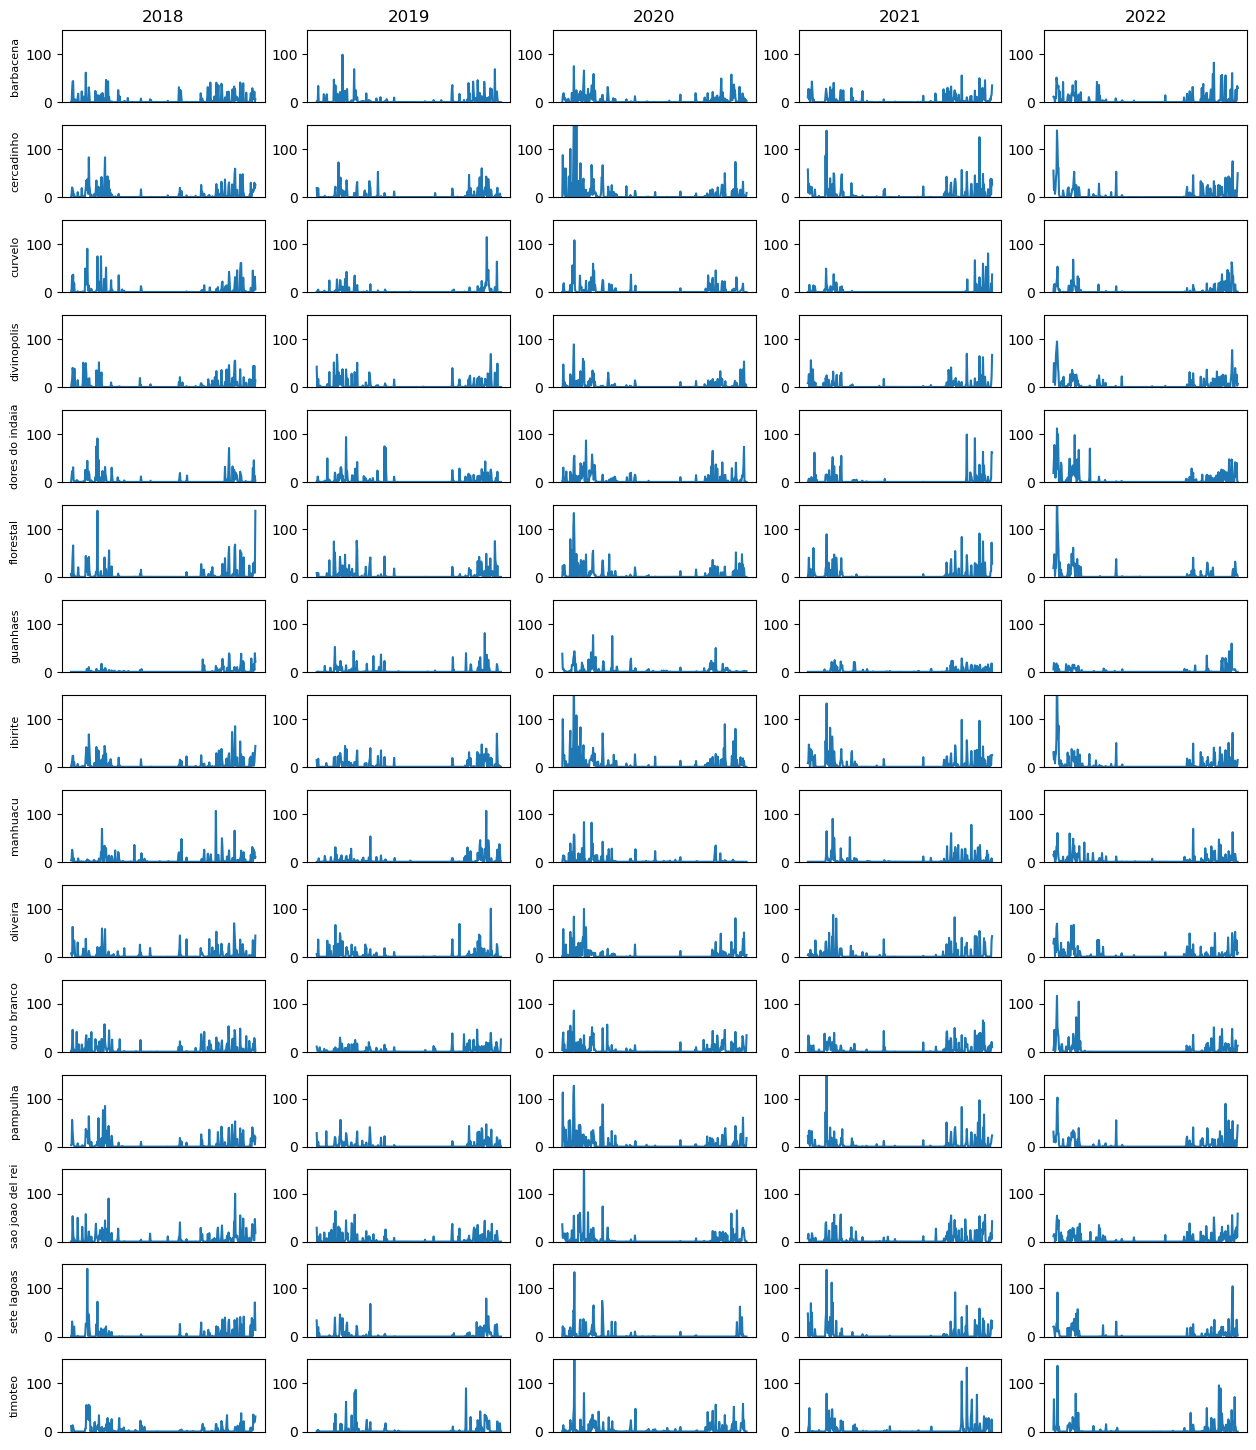

In [106]:
plot_rain_by_day_station(dfs_by_year)

In [95]:
def plot_hourly_heatmap_for_station(dfs_by_year,station,data):
    matrix = []
    for year in dfs_by_year:
        df=dfs_by_year[year][dfs_by_year[year]['NOME ESTACAO']==station].copy()
        df['Data'] = pd.to_datetime(df['Data'])
        df=df.set_index('timestamp').asfreq('H')
        df = df.reindex(pd.date_range(f'01-01-{year}', f'31-12-{year} 23:00',freq='H',tz='UTC'))
        line = df[data].tolist()
        if len(line) ==8760:
            line+=[np.nan]*24
        matrix.append(line)
    matrix=np.array(matrix)
    plt.figure(figsize=(20,3))
    sns.heatmap(matrix+1,yticklabels=dfs_by_year.keys(), norm=LogNorm(),cmap='viridis')
    plt.xticks([])

In [96]:
def plot_daily_heatmap_for_station(dfs_by_year,station,data):
    matrix = []
    for year in dfs_by_year:
        df=dfs_by_year[year][dfs_by_year[year]['NOME ESTACAO']==station].copy()
        df=df.set_index('timestamp').asfreq('H')
        df = df.reindex(pd.date_range(f'01-01-{year}', f'31-12-{year} 23:00',freq='H',tz='UTC')).reset_index()
        df['Data'] = df['index'].apply(lambda x:x.strftime('%Y-%m-%d'))
        df['Data'] = pd.to_datetime(df['Data'])
        line = df.groupby('Data')[data].sum(min_count=1).tolist()
        if len(line) ==365:
            line.append(np.nan)
        matrix.append(line)
    matrix=np.array(matrix)
    plt.figure(figsize=(20,3))
    sns.heatmap(matrix+1,yticklabels=dfs_by_year.keys(), norm=LogNorm(),cmap='viridis')
    plt.xticks([])

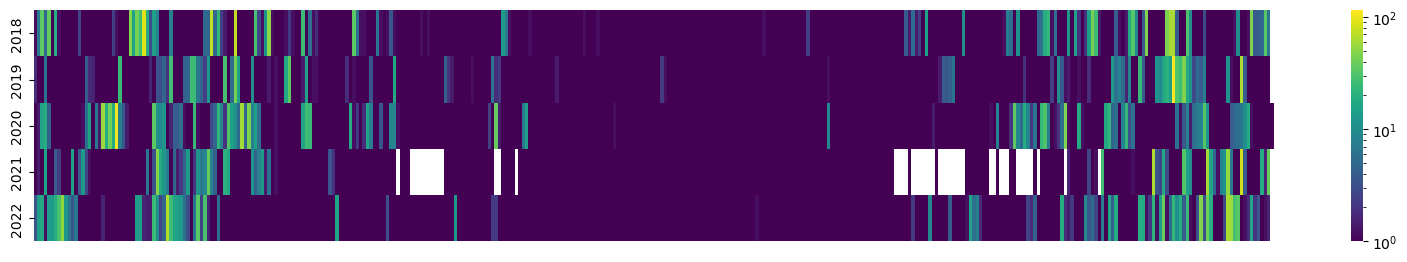

In [99]:
d=plot_daily_heatmap_for_station(dfs_by_year,'curvelo','PRECIPITAÇÃO TOTAL, HORÁRIO (mm)')

In [180]:
def plot_temperature_rain_graph_by_year(dfs_by_year):
    stats = []
    for year in dfs_by_year:
        df = dfs_by_year[year].copy()
        df['Data'] = pd.to_datetime(df['Data'])
        temperature_data = df.groupby(df['Data'].dt.month)['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean()
        rain_data = df.groupby(df['timestamp'])[['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)','Data']].mean()
        rain_data = rain_data.groupby('Data')['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()
        rain_data = rain_data.groupby(rain_data['Data'].dt.month)['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum()
        fig, ax1 = plt.subplots()

        color = 'tab:blue'
        ax1.set_xlabel('Mês')
        ax1.set_ylabel('Precipitação (mm)', color=color)
        ax1.bar(rain_data.index,rain_data, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:red'
        ax2.set_ylabel('Temperatura (°C)', color=color)  # we already handled the x-label with ax1
        ax2.plot(temperature_data, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.title(year)
        plt.show()
        stats.append([year,rain_data.sum(),temperature_data.mean()])
    return pd.DataFrame(stats,columns=['Ano','Precipitação (mm)','Temperatura (°C)'])

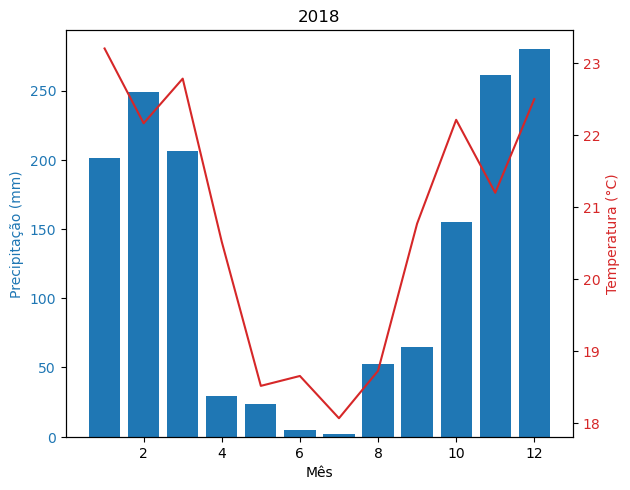

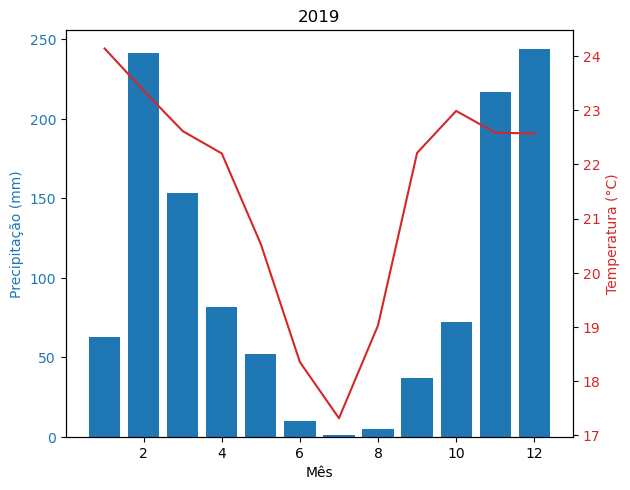

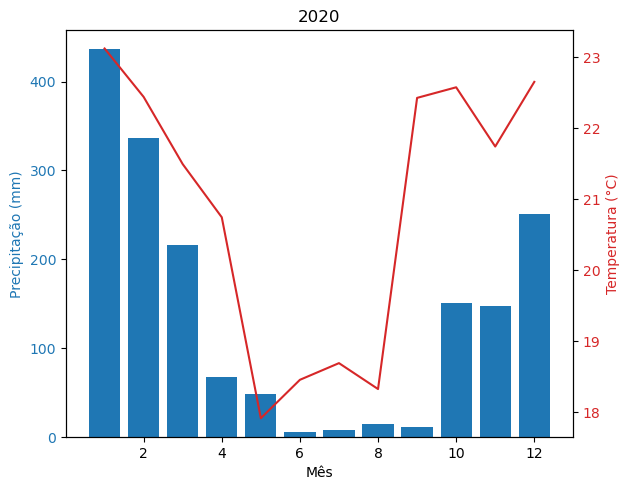

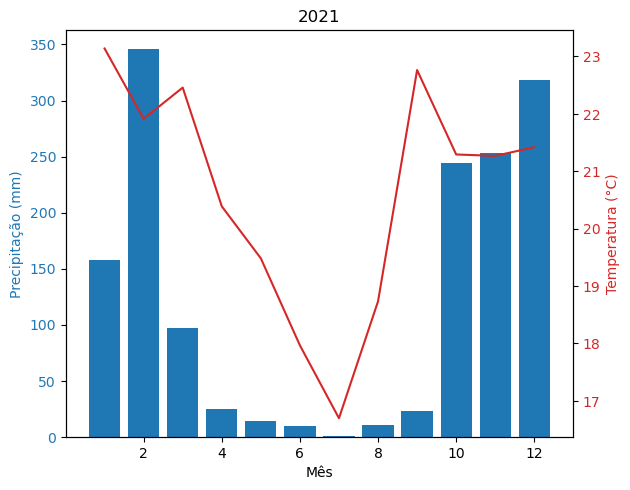

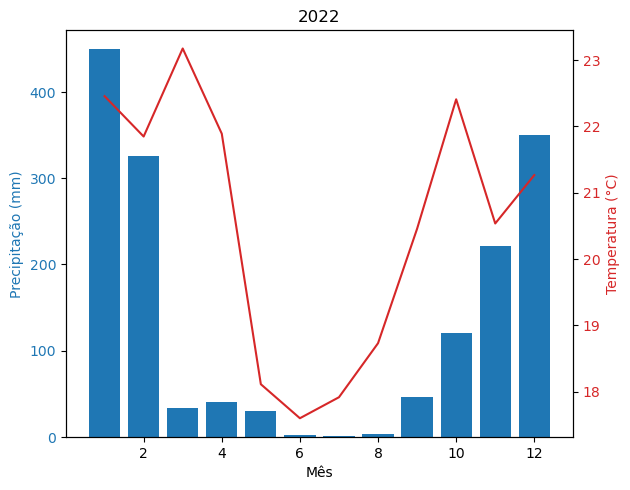

In [181]:
df=plot_temperature_rain_graph_by_year(dfs_by_year)

In [182]:
df.set_index('Ano')

,Precipitação (mm),Temperatura (°C)
Ano,,
2018,1530.013260,20.778368
2019,1176.486740,21.490671
2020,1691.286657,20.880715
2021,1497.520010,20.625194
2022,1621.437619,20.531895
